# Image Manipulation & SVD
## Examples of image manipulation using the Python Image Library (PIL) as well as Singular Value Decomposition (SVD) for image compression
## 4. a) Read in image1 and image2 as color images and display them

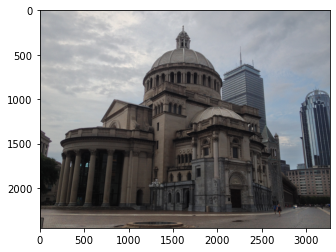

In [1]:
# Imports PIL module  
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageOps
  
# open method used to open different extension image file 
image1 = Image.open(r"/Users/Desktop/image1.jpg")
image2 = Image.open(r"/Users/Desktop/image2.jpg")
  
# This method will show image in any image viewer  
imshow(np.asarray(image1))

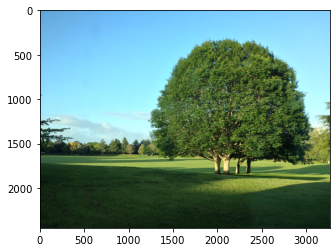

In [2]:
imshow(np.asarray(image2))

## b) Crop the square region of width = height = 1000 at upper left corner (1100, 100) of image1. Rotate the cropped region 90 degrees counter clockwise and paste the rotated region over image2 at the upper left corner (100, 100).

In [3]:
print(image1.size)

(3264, 2448)


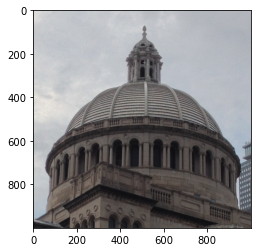

In [4]:
left = 1100
top = 100
right = 2100
bottom = 1100
imagecrop1 = image1.crop((left, top, right, bottom))
imshow(np.asarray(imagecrop1))

In [5]:
# save the image  
imagecrop1.save('image1_crop.jpg')

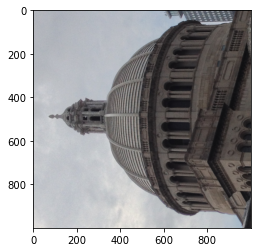

In [6]:
rotatedimage1 = imagecrop1.rotate(90)
imshow(np.asarray(rotatedimage1))

In [7]:
# save the image  
rotatedimage1.save('image1_crop_rotated.jpg')

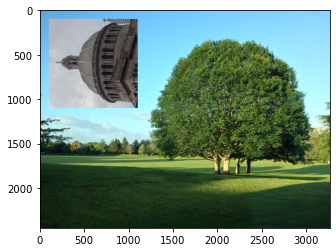

In [8]:
overlap = image2.copy() 
overlap.paste(rotatedimage1, (100,100))
imshow(np.asarray(overlap))

In [9]:
# save the image  
overlap.save('image2_pasted.jpg')

## c) Resize image1 and image2 to 512 by 512. Create a new image such that the top half of the image is the top half of image 1 and the bottom half of the image is the bottom half of image2.

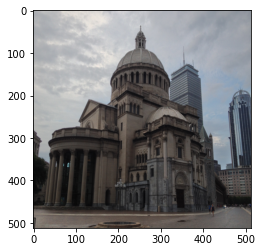

In [10]:
# Resize Images
size = 512, 512
image1new = image1.resize(size)
image2new = image2.resize(size)
imshow(np.asarray(image1new))

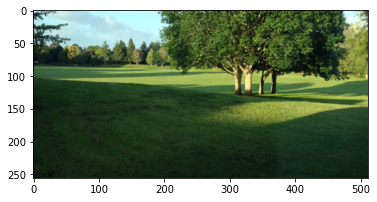

In [11]:
#Crop image2
left = 0
top = 256
right = 512
bottom = 512
imagecrop2 = image2new.crop((left, top, right, bottom))
imshow(np.asarray(imagecrop2))

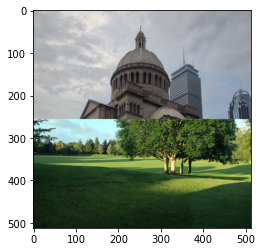

In [12]:
#Paste new image2 on image 1
composite = image1new.copy() 
composite.paste(imagecrop2, (0,256))
imshow(np.asarray(composite))

In [13]:
# save the image  
composite.save('image12_composited.jpg')

## 5. a) Read in the image “svd_test.jpg” as a grayscale image and display it.

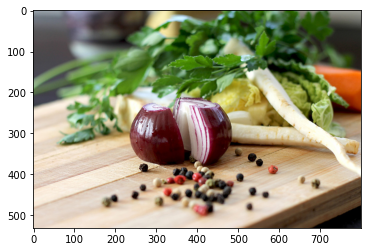

In [14]:
svd_test = Image.open(r"/Users/Desktop/image2.jpg")
imshow(np.asarray(svd_test))

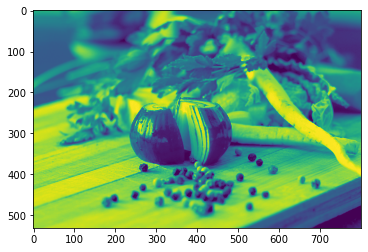

In [15]:
graysvd = ImageOps.grayscale(svd_test)
imshow(np.asarray(graysvd))

## b) Take the singular value decomposition of the image. What is the rank of the image matrix?

In [16]:
U, sigma, Vt = np.linalg.svd(graysvd, full_matrices=False)
print(U.shape)

(531, 531)


### Rank of the matrix is equal to the number of linearly independent rows/columns. Moreover, if the matrix is of rank k, the first k left singular vectors will be the columns of U. Therefore, the rank of the matrix is 531.

## c) Show the best rank n approximation of the image for n = 1, 5, 20, and 100. For each approximated image, clearly indicate the value of n used.

## n = 1 

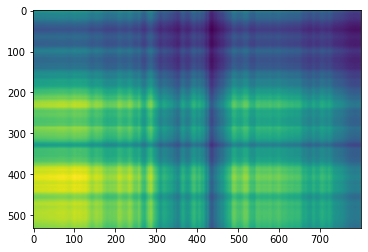

In [17]:
reconstruc1 = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(Vt[:1, :])
imshow(np.asarray(reconstruc1))
# Convert to PIL Image
pilimage1 = Image.fromarray(reconstruc1)
if pilimage1.mode != 'RGB':
    pilimage1 = pilimage1.convert('RGB')
# save the image  
pilimage1.save('rank_1_approx.jpg')

## n = 5

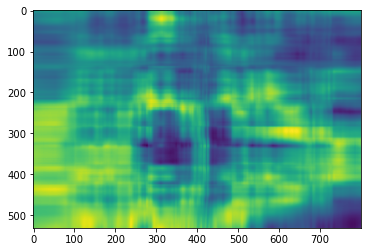

In [18]:
reconstruc5 = np.matrix(U[:, :5]) * np.diag(sigma[:5]) * np.matrix(Vt[:5, :])
imshow(np.asarray(reconstruc5))
# Convert to PIL Image
pilimage5 = Image.fromarray(reconstruc5)
if pilimage5.mode != 'RGB':
    pilimage5 = pilimage5.convert('RGB')
# save the image  
pilimage5.save('rank_5_approx.jpg')

## n = 20

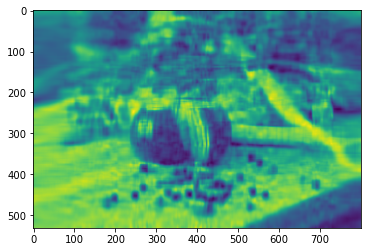

In [19]:
reconstruc20 = np.matrix(U[:, :20]) * np.diag(sigma[:20]) * np.matrix(Vt[:20, :])
imshow(np.asarray(reconstruc20))
# Convert to PIL Image
pilimage20 = Image.fromarray(reconstruc20)
if pilimage20.mode != 'RGB':
    pilimage20 = pilimage20.convert('RGB')
# save the image  
pilimage20.save('rank_20_approx.jpg')

## n = 100

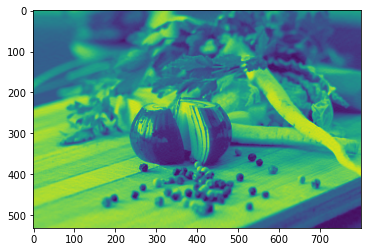

In [20]:
reconstruc100 = np.matrix(U[:, :100]) * np.diag(sigma[:100]) * np.matrix(Vt[:100, :])
imshow(np.asarray(reconstruc100))
# Convert to PIL Image
pilimage100 = Image.fromarray(reconstruc100)
if pilimage100.mode != 'RGB':
    pilimage100 = pilimage100.convert('RGB')
# save the image  
pilimage100.save('rank_100_approx.jpg')